In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# I- Hiqtorique de rendement 

In [4]:
# Charger le fichier CSV
historique_rendements = "../data/historique_rendements.csv"
data = pd.read_csv(historique_rendements)
df = pd.DataFrame(data)

In [5]:
# Afficher les premières lignes
print("🔹 1. Aperçu des premières lignes (head) :\n")
df.head(5)

🔹 1. Aperçu des premières lignes (head) :



,parcelle_id,date,culture,rendement_estime,rendement_final,progression
0,P001,2020-01-31,Ble,0.00,NaN,0.0
1,P001,2020-02-29,Ble,0.83,NaN,12.1
2,P001,2020-03-31,Ble,1.61,NaN,25.0
3,P001,2020-04-30,Mais,0.00,NaN,0.0
4,P001,2020-05-31,Mais,1.60,NaN,17.2


In [6]:
# Dimensions des données
print("🔹 2. Dimensions des données (shape) :\n")
print(f"Lignes : {df.shape[0]}, Colonnes : {df.shape[1]}")

🔹 2. Dimensions des données (shape) :

Lignes : 3000, Colonnes : 6


In [7]:
# Informations sur le DataFrame
print("🔹 3. Informations sur les données :\n")
df.info()

🔹 3. Informations sur les données :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   parcelle_id       3000 non-null   object 
 1   date              3000 non-null   object 
 2   culture           3000 non-null   object 
 3   rendement_estime  3000 non-null   float64
 4   rendement_final   506 non-null    float64
 5   progression       3000 non-null   float64
dtypes: float64(3), object(3)
memory usage: 140.8+ KB


In [8]:
# Vérification des doublons
print("🔹 4. Vérification des doublons :\n")
print(np.unique(df.duplicated(), return_counts=True))

🔹 4. Vérification des doublons :

(array([False]), array([3000]))


In [12]:
# Valeurs uniques dans les colonnes "annee" et "culture"
print("🔹 5. Valeurs uniques dans 'date' :\n")
print(np.unique(df["date"]))

🔹 5. Valeurs uniques dans 'date' :

['2020-01-31' '2020-02-29' '2020-03-31' '2020-04-30' '2020-05-31'
 '2020-06-30' '2020-07-31' '2020-08-31' '2020-09-30' '2020-10-31'
 '2020-11-30' '2020-12-31' '2021-01-31' '2021-02-28' '2021-03-31'
 '2021-04-30' '2021-05-31' '2021-06-30' '2021-07-31' '2021-08-31'
 '2021-09-30' '2021-10-31' '2021-11-30' '2021-12-31' '2022-01-31'
 '2022-02-28' '2022-03-31' '2022-04-30' '2022-05-31' '2022-06-30'
 '2022-07-31' '2022-08-31' '2022-09-30' '2022-10-31' '2022-11-30'
 '2022-12-31' '2023-01-31' '2023-02-28' '2023-03-31' '2023-04-30'
 '2023-05-31' '2023-06-30' '2023-07-31' '2023-08-31' '2023-09-30'
 '2023-10-31' '2023-11-30' '2023-12-31' '2024-01-31' '2024-02-29'
 '2024-03-31' '2024-04-30' '2024-05-31' '2024-06-30' '2024-07-31'
 '2024-08-31' '2024-09-30' '2024-10-31' '2024-11-30' '2024-12-31']


In [13]:
print("🔹 6. Valeurs uniques dans 'culture' :\n")
print(np.unique(df["culture"]))

🔹 6. Valeurs uniques dans 'culture' :

['Ble' 'Mais' 'Tournesol']


In [14]:
# Valeurs manquantes
print("🔹 7. Valeurs manquantes par colonne :\n")
df.isnull().sum()

🔹 7. Valeurs manquantes par colonne :



parcelle_id            0
date                   0
culture                0
rendement_estime       0
rendement_final     2494
progression            0
dtype: int64

In [15]:
# Statistiques descriptives
print("🔹 8. Statistiques descriptives :\n")
df.describe()

🔹 8. Statistiques descriptives :



,rendement_estime,rendement_final,progression
count,3000.000000,506.000000,3000.000000
mean,2.789077,5.671030,45.713600
std,2.650564,3.104011,35.136676
min,0.000000,2.030082,0.000000
25%,0.767500,3.076001,16.700000
50%,2.110000,4.532630,40.700000
75%,3.910000,8.216792,77.525000
max,13.450000,11.818146,100.000000


In [18]:
# Profit généré par année et produit
print("🔹 9. Profit généré par année et par produit:\n")
result = df.groupby(["date", "culture"])["rendement_final"].sum().unstack()
result["total profit"] = df.groupby("date")["rendement_final"].sum()
result

🔹 9. Profit généré par année et par produit:



culture,Ble,Mais,Tournesol,total profit
date,,,,
2020-01-31,0.000000,0.000000,0.000000,0.000000
2020-02-29,0.000000,0.000000,0.000000,0.000000
2020-03-31,0.000000,0.000000,0.000000,0.000000
2020-04-30,0.000000,0.000000,0.000000,0.000000
2020-05-31,0.000000,0.000000,0.000000,0.000000
2020-06-30,0.000000,0.000000,0.000000,0.000000
2020-07-31,0.000000,15.757782,0.000000,15.757782
2020-08-31,0.000000,15.757782,5.858220,21.616002
2020-09-30,26.830962,69.044750,40.579514,136.455226


In [19]:
# Profit généré par année et produit
print("🔹 9. Profit généré par année et par produit:\n")
result = df.groupby(["date", "culture"])["rendement_estime"].sum().unstack()
result["total profit"] = df.groupby("date")["rendement_estime"].sum()
result

🔹 9. Profit généré par année et par produit:



culture,Ble,Mais,Tournesol,total profit
date,,,,
2020-01-31,0.00,0.00,0.00,0.00
2020-02-29,15.97,31.82,6.21,54.00
2020-03-31,11.53,17.92,2.63,32.08
2020-04-30,12.56,19.02,1.27,32.85
2020-05-31,29.33,47.56,9.95,86.84
2020-06-30,43.98,72.27,17.30,133.55
2020-07-31,56.70,94.35,25.05,176.10
2020-08-31,69.49,112.55,31.10,213.14
2020-09-30,81.93,133.60,35.61,251.14


🔹 10. Histogramme de 'rendement_final':



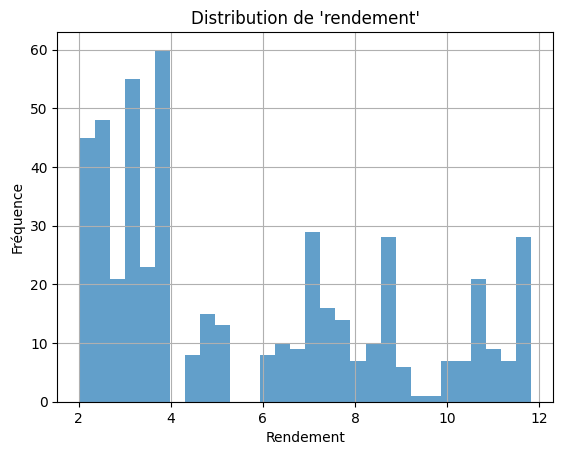

In [22]:
# Distribution des rendements
print("🔹 10. Histogramme de 'rendement_final':\n")
df["rendement_final"].plot(kind='hist', bins=30, alpha=0.7, title="Distribution de 'rendement'")
plt.xlabel("Rendement")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

🔹 10. Histogramme de 'rendement_estime':



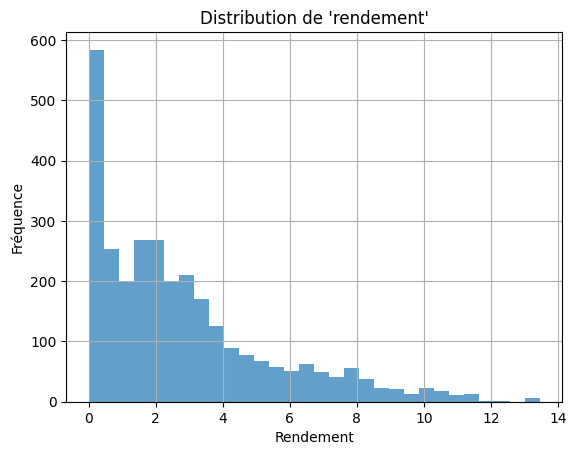

In [24]:
# Distribution des rendements
print("🔹 10. Histogramme de 'rendement_estime':\n")
df["rendement_estime"].plot(kind='hist', bins=30, alpha=0.7, title="Distribution de 'rendement'")
plt.xlabel("Rendement")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

🔹 11. Boxplot de 'rendement' groupé par 'culture':



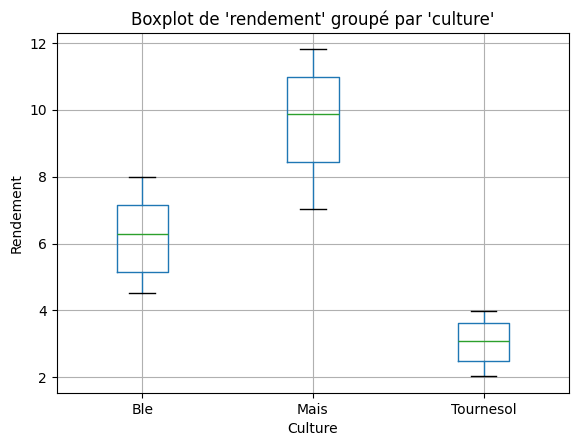

In [25]:
# Boxplot par culture
print("🔹 11. Boxplot de 'rendement' groupé par 'culture':\n")
df.boxplot(column="rendement_final", by="culture")
plt.title("Boxplot de 'rendement' groupé par 'culture'")
plt.suptitle("")  # Supprime le titre par défaut
plt.xlabel("Culture")
plt.ylabel("Rendement")
plt.grid(True)
plt.show()

🔹 11. Boxplot de 'rendement' groupé par 'culture':



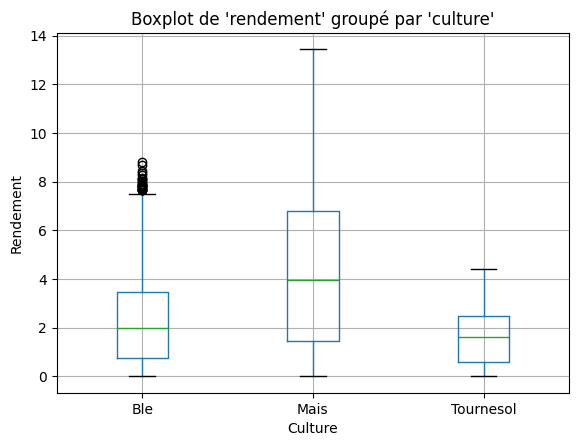

In [26]:
# Boxplot par culture
print("🔹 11. Boxplot de 'rendement' groupé par 'culture':\n")
df.boxplot(column="rendement_estime", by="culture")
plt.title("Boxplot de 'rendement' groupé par 'culture'")
plt.suptitle("")  # Supprime le titre par défaut
plt.xlabel("Culture")
plt.ylabel("Rendement")
plt.grid(True)
plt.show()

In [28]:
# Détection des outliers
print("🔹 12. Détection des outliers pour 'rendement':\n")
q1 = df["rendement_final"].quantile(0.25)
q3 = df["rendement_final"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Borne inférieure : {lower_bound}, Borne supérieure : {upper_bound}")
outliers = df[(df["rendement_final"] < lower_bound) | (df["rendement_final"] > upper_bound)]

🔹 12. Détection des outliers pour 'rendement':

Borne inférieure : -4.635185214643924, Borne supérieure : 15.927978781963562


In [29]:
print(f"Nombre d'outliers : {outliers.shape[0]}")
outliers

Nombre d'outliers : 0


,parcelle_id,date,culture,rendement_estime,rendement_final,progression


In [30]:
# Détection des outliers
print("🔹 12. Détection des outliers pour 'rendement_estime':\n")
q1 = df["rendement_estime"].quantile(0.25)
q3 = df["rendement_estime"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Borne inférieure : {lower_bound}, Borne supérieure : {upper_bound}")
outliers = df[(df["rendement_estime"] < lower_bound) | (df["rendement_estime"] > upper_bound)]

🔹 12. Détection des outliers pour 'rendement_estime':

Borne inférieure : -3.94625, Borne supérieure : 8.623750000000001


In [33]:
print(f"Nombre d'outliers : {outliers.shape[0]}")
outliers

Nombre d'outliers : 125


,parcelle_id,date,culture,rendement_estime,rendement_final,progression
80,P002,2021-09-30,Mais,9.62,NaN,85.0
98,P002,2023-03-31,Mais,8.74,NaN,83.9
99,P002,2023-04-30,Mais,9.44,8.562412,100.0
100,P002,2023-05-31,Mais,9.14,8.562412,100.0
101,P002,2023-06-30,Mais,8.91,8.562412,100.0
...,...,...,...,...,...,...
2653,P045,2021-02-28,Mais,11.04,10.092044,100.0
2798,P047,2023-03-31,Mais,9.61,NaN,83.9
2905,P049,2022-02-28,Ble,8.80,7.757341,100.0
2906,P049,2022-03-31,Ble,8.67,7.757341,100.0


🔹 13. Pairplot des données:



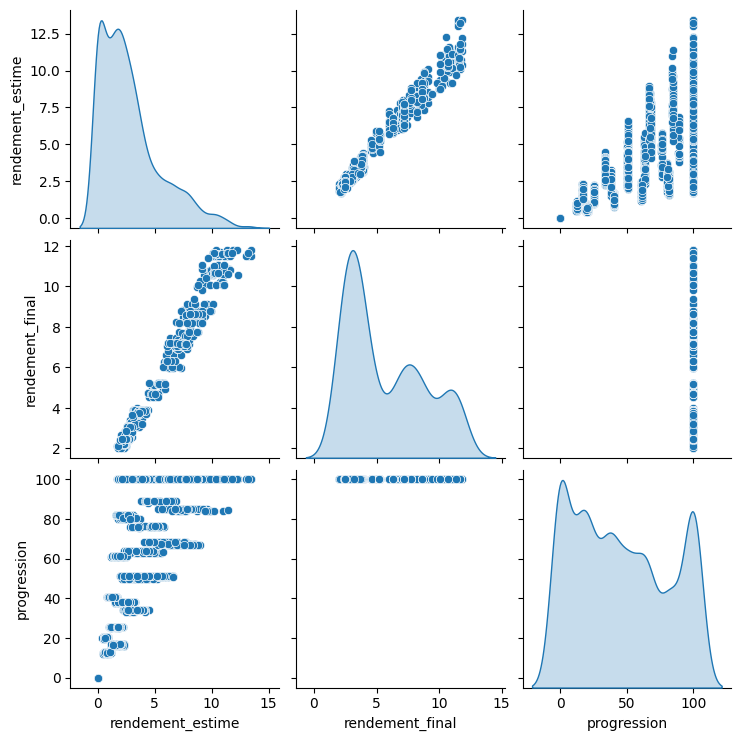

In [34]:
# Pairplot des données
print("🔹 13. Pairplot des données:\n")
sns.pairplot(df, diag_kind="kde")
plt.show()

 ## Analyse des Données

### Aperçu des données

- **Nombre de lignes (rows) :** 250  
- **Nombre de colonnes (columns) :** 4  
- **Noms des colonnes :** `parcelle_id`, `annee`, `culture`, `rendement`  
- **Doublons :** Aucun doublon détecté  
- **Valeurs manquantes :** Aucune  
- **Années :** 5, de 2020 à 2024  
- **Cultures :** `Mais`, `Ble`, `Tournesol`  

---

### Statistiques descriptives

- **Moyenne des rendements :** 6.89  
- **Rendement minimum :** 0.77  
- **Rendement maximum :** 20.77  
- **Médiane des rendements :** 5.61  
- **Écart-type :** 4.54  
- La **médiane** est supérieure à la **moyenne**, indiquant une **asymétrie à droite**, ce qui met en évidence la présence de **outliers** potentiels.  

---

### Outliers

- **Méthode IQR :**  
    - **Borne inférieure :** -6.04  
    - **Borne supérieure :** 19.37  

- En utilisant ces bornes, le jeu de données contient des **outliers** à l'extrémité supérieure, avec au moins **2 cas détectés** :  
  - **parcelle_id P003 (2020, Mais) : rendement = 20.77**  
  - **parcelle_id P035 (2020, Mais) : rendement = 20.01**

---

### Visualisations

- **Histogramme :**  
  La distribution des rendements est **asymétrique à droite** (right-skewed), avec la majorité des rendements concentrés entre **0 et 10**.  

- **Boxplot :**  
  Le boxplot montre une variation significative des rendements selon la culture :  
  - **Mais** a la **médiane la plus élevée** et les valeurs les plus dispersées (avec des outliers).  
  - **Ble** a une distribution plus homogène, concentrée entre 5 et 10.  
  - **Tournesol** a des rendements généralement faibles, concentrés entre 2 et 5.  

---

### Interprétation

- **Pourquoi Mais surpasse-t-il les autres cultures ?**  
  La culture de Mais semble être associée à des rendements plus élevés. Cela pourrait être dû à des **conditions spécifiques** favorables à cette culture, comme les pratiques agricoles, le type de sol ou les conditions climatiques


# II- Meteo détaillée

In [37]:
# Charger les données
meteo_detaillee = "../data/meteo_detaillee .csv"
data = pd.read_csv(meteo_detaillee)
df = pd.DataFrame(data)

In [50]:
# **Aperçu des données**
print("🔹 1. Aperçu des premières lignes (head):\n")
display(df.head())

🔹 1. Aperçu des premières lignes (head):



,date,temperature,humidite,precipitation,rayonnement_solaire,vitesse_vent,direction_vent
0,2020-01-01 00:00:00,6.97,83.49,0.0,0.0,3.0,262.3
1,2020-01-01 01:00:00,5.61,86.95,0.0,0.0,8.4,268.4
2,2020-01-01 02:00:00,5.41,95.00,0.0,0.0,7.4,133.8
3,2020-01-01 03:00:00,1.93,95.00,0.0,0.0,5.7,171.6
4,2020-01-01 04:00:00,3.94,93.83,0.0,0.0,6.3,119.0


In [51]:
# Dimensions des données
print("🔹 2. Dimensions des données (shape):\n")
print(f"Lignes : {df.shape[0]}, Colonnes : {df.shape[1]}")

🔹 2. Dimensions des données (shape):

Lignes : 43848, Colonnes : 7


In [38]:
# Informations générales
print("🔹 3. Informations sur le DataFrame (info):\n")
df.info()

🔹 3. Informations sur le DataFrame (info):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 43848 non-null  object 
 1   temperature          43848 non-null  float64
 2   humidite             43848 non-null  float64
 3   precipitation        43848 non-null  float64
 4   rayonnement_solaire  43848 non-null  float64
 5   vitesse_vent         43848 non-null  float64
 6   direction_vent       43848 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.3+ MB


In [40]:
# Vérification des doublons
print("🔹 4. Doublons :\n")
duplicates = np.unique(df.duplicated())
print(f"   Doublons : {duplicates}")

🔹 4. Doublons :

   Doublons : [False]


In [42]:
 # Vérification des valeurs manquantes
print("🔹 5. Valeurs manquantes par colonne :\n")
missing_values = df.isnull().sum()
print(missing_values)

🔹 5. Valeurs manquantes par colonne :

date                   0
temperature            0
humidite               0
precipitation          0
rayonnement_solaire    0
vitesse_vent           0
direction_vent         0
dtype: int64


In [43]:
# Conversion de la colonne "date" en format datetime
print("🔹 5. Conversion de la colonne 'date' en format datetime :\n")
df["date"] = pd.to_datetime(df["date"])
df["date"].info()

🔹 5. Conversion de la colonne 'date' en format datetime :

<class 'pandas.core.series.Series'>
RangeIndex: 43848 entries, 0 to 43847
Series name: date
Non-Null Count  Dtype         
--------------  -----         
43848 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 342.7 KB


In [44]:
# Statistiques descriptives
print("🔹 6. Statistiques descriptives :\n")
df.describe().round(2)

🔹 6. Statistiques descriptives :



,date,temperature,humidite,precipitation,rayonnement_solaire,vitesse_vent,direction_vent
count,43848,43848.00,43848.00,43848.00,43848.00,43848.00,43848.00
mean,2022-07-02 11:30:00,14.99,69.74,0.20,-0.07,5.31,179.32
min,2020-01-01 00:00:00,-2.30,30.00,0.00,-999.99,0.00,0.00
25%,2021-04-01 17:45:00,8.68,57.07,0.00,0.00,3.20,89.60
50%,2022-07-02 11:30:00,15.00,70.08,0.00,0.00,5.00,179.15
75%,2023-10-02 05:15:00,21.30,83.07,0.00,0.00,7.10,268.82
max,2024-12-31 23:00:00,32.44,95.00,16.97,999.99,21.20,360.00
std,NaN,7.98,16.14,0.88,353.38,2.77,103.86


In [45]:
# **Vérification des valeurs négatives**
print("🔹 7. Vérification des valeurs négatives pour toutes les colonnes numériques:\n")
numeric_columns = df.select_dtypes(include='number')  # Colonnes numériques
negative_values = {}

for col in numeric_columns.columns:
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            negative_values[col] = negative_count
            print(f"   Colonne '{col}' : {negative_count} valeurs négatives")
        else:
            print(f"   Colonne '{col}' : Aucune valeur négative détectée")

if not negative_values:
        print("   Aucune colonne ne contient de valeurs négatives.")

🔹 7. Vérification des valeurs négatives pour toutes les colonnes numériques:

   Colonne 'temperature' : 381 valeurs négatives
   Colonne 'humidite' : Aucune valeur négative détectée
   Colonne 'precipitation' : Aucune valeur négative détectée
   Colonne 'rayonnement_solaire' : 10032 valeurs négatives
   Colonne 'vitesse_vent' : Aucune valeur négative détectée
   Colonne 'direction_vent' : Aucune valeur négative détectée



🔹 8. Visualisation des distributions (3 graphiques par ligne) :


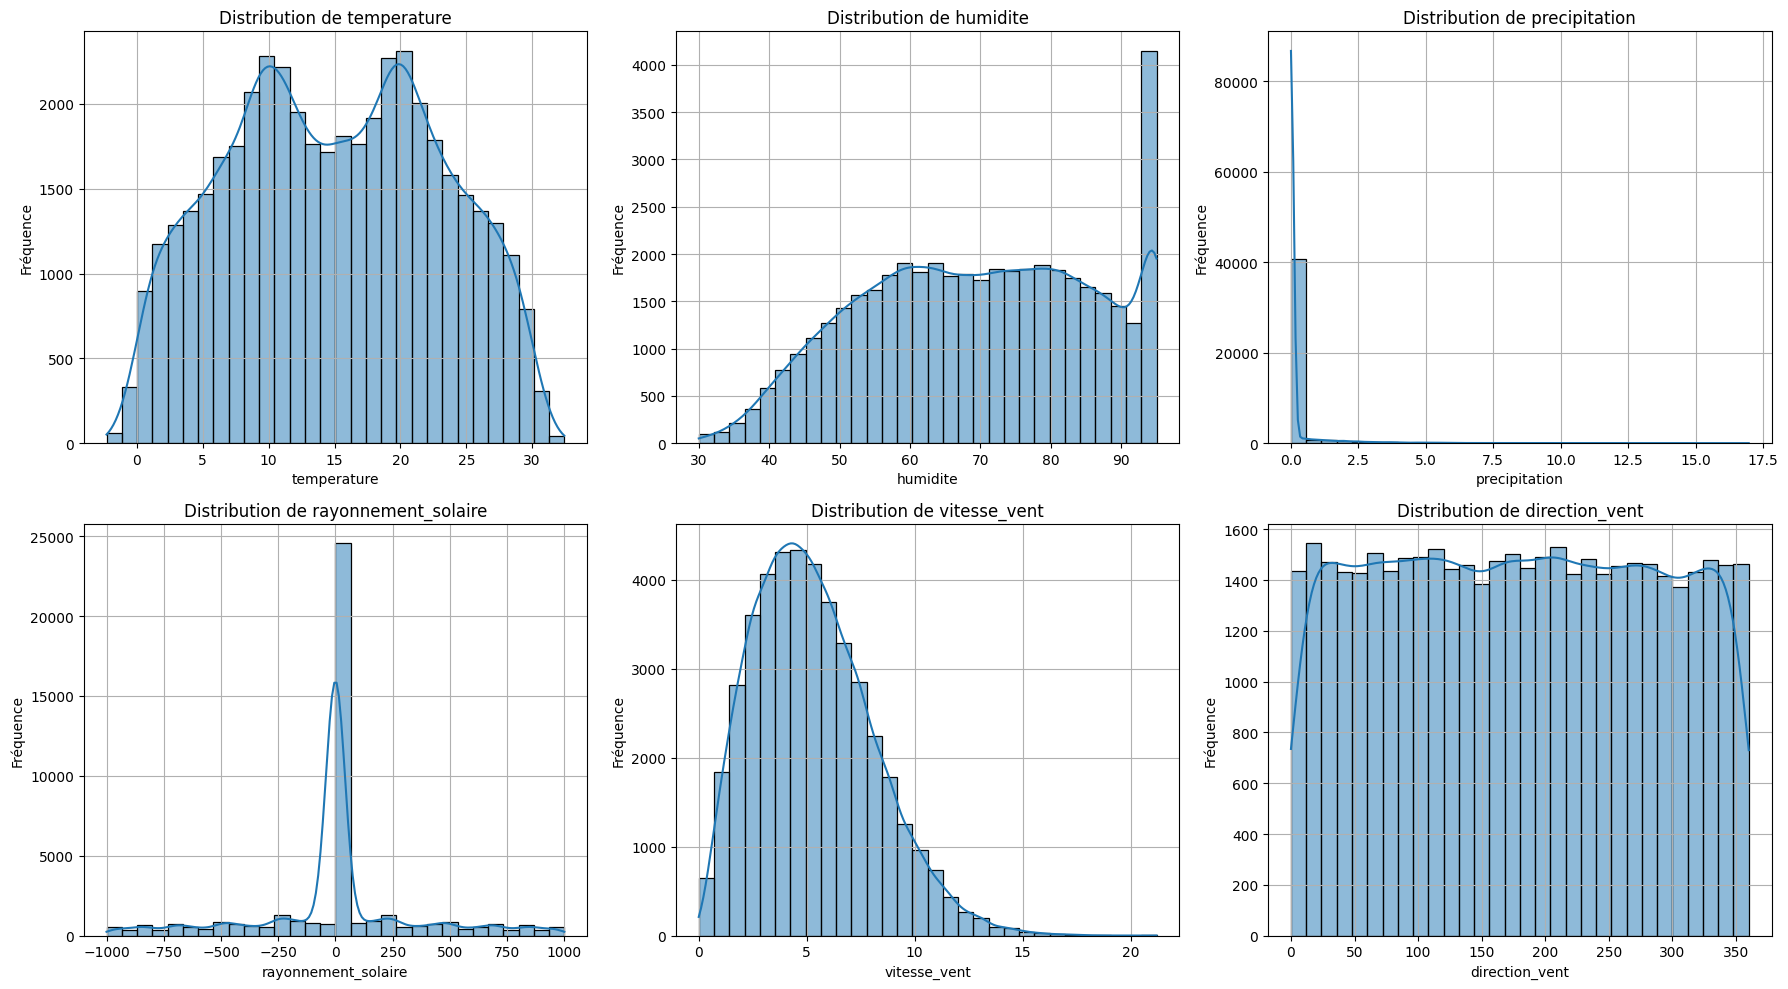

In [46]:
# **Distribution des variables**
_columns = df.columns[1:]  # Supposer que toutes les colonnes sauf "date" sont numériques
# Distribution des variables numériques (3 graphiques par ligne)
print("\n🔹 8. Visualisation des distributions (3 graphiques par ligne) :")

num_graphs = len(_columns)

# Organiser les graphiques 3 par ligne
rows = (num_graphs // 3) + (1 if num_graphs % 3 != 0 else 0)
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 5))

# Aplatir les axes pour simplifier l'itération
axes = axes.flatten()

for i, col in enumerate(_columns):
   sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
   axes[i].set_title(f"Distribution de {col}")
   axes[i].set_xlabel(col)
   axes[i].set_ylabel("Fréquence")
   axes[i].grid(True)

# Supprimer les axes inutilisés si le nombre de colonnes n'est pas un multiple de 3
for j in range(i + 1, len(axes)):
   fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


🔹 10. Matrice de corrélation :


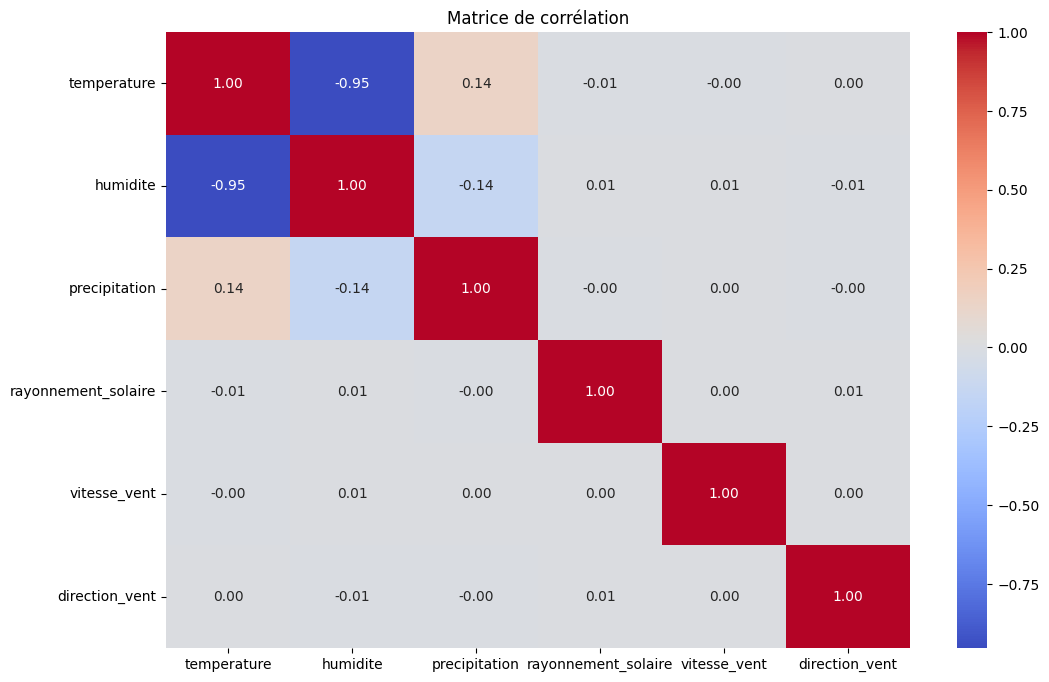

In [47]:
 # Matrice de corrélation
print("\n🔹 10. Matrice de corrélation :")
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()                   

## Analyse Complète des Données

### 1. Aperçu des Données
- Pas de valeurs manquantes.
- Pas de doublons.
- **43848** lignes et **7 colonnes**.
- La colonne `date` a été convertie au format datetime.

---

### 2. Statistiques Descriptives
- **`temperature`** : varie de **-2.3°C** à **32.44°C**, moyenne : **14.99°C**.
- **`humidite`** : varie de **30%** à **95%**, moyenne : **69.74%**.
- **`precipitation`** : la majorité des valeurs est concentrée autour de **0**, indiquant de nombreuses périodes de **sécheresse**.
- **`rayonnement_solaire`** :
  - Contient des **valeurs négatives** (erreur dans les données).
  - La plage actuelle varie de **-999.99** à **999.99**.
  - **Les valeurs négatives doivent être nettoyées** pour qu'elles soient positives.
- **`vitesse_vent`** : varie de **0 m/s** à **21 m/s**, moyenne : **5.31 m/s**.
- **`direction_vent`** : semble uniforme avec des valeurs allant de **0°** à **360°**.

---

### 3. Distribution
- `temperature`, `humidite`, et `vitesse_vent` suivent une distribution **approximativement normale**.
- `precipitation` et `rayonnement_solaire` sont **biaisés** en raison de nombreux **zéros**.
- `direction_vent` apparaît **uniforme**, ce qui est attendu.

---

### 4. Corrélations
- **`temperature`** et **`humidite`** montrent une **forte corrélation négative** de **-0.95**.
- **`temperature`** et **`precipitation`** ont une **très faible corrélation positive** de **0.14**.
- **`temperature`** et **`rayonnement_solaire`** n'ont **quasiment aucune corrélation** (**-0.01**).
- **`vitesse_vent`** n'a pas de **corrélations significatives** avec les autres variables.
- **`precipitation`** montre des **corrélations très faibles** avec les autres variables.
- **`direction_vent`** est **indépendante** des autres variables.

---

### 5. Observations et Idées
- Utiliser **`temperature`** et **`humidite`** pour un **modèle prédictif** basé sur leur forte relation.
- **Nettoyer les valeurs négatives** dans la colonne **`rayonnement_solaire`** pour qu'elles soient positives.
- Vérifier si les **zéros** dans **`precipitation`** représentent de véritables périodes de **sécheresse** ou des **erreurs de données**.

---

### Visualisations
1. **Histogrammes** des distributions des variables numériques (3 par ligne pour une meilleure lisibilité).
2. **Boxplots** pour détecter les outliers, notamment dans **`rendement`** et **`rayonnement_solaire`**.
3. **Matrice de corrélation** pour visualiser les relations entre les variables.

# III- Monitoring culture 

In [49]:

# Load the data
file_path = '../data/monitoring_cultures.csv'  # Replace with your file path
df = pd.read_csv(file_path)


In [50]:
# 1. Overview of the data
print("\n🔹  monitoring 1. Aperçu des premières lignes :")
display(df.head())


🔹  monitoring 1. Aperçu des premières lignes :


,date,parcelle_id,latitude,longitude,culture,ndvi,lai,stress_hydrique,biomasse_estimee
0,2020-01-01,P001,33.85339,-5.515999,sol_nu,0.181,0.15,0.0,0.0
1,2020-01-02,P001,33.85339,-5.515999,sol_nu,0.190,0.26,0.0,0.0
2,2020-01-03,P001,33.85339,-5.515999,sol_nu,0.164,0.21,0.0,0.0
3,2020-01-04,P001,33.85339,-5.515999,sol_nu,0.178,0.20,0.0,0.0
4,2020-01-05,P001,33.85339,-5.515999,sol_nu,0.140,0.18,0.0,0.0


In [51]:

print("\n🔹 2. Dimensions des données :")
print(f"Lignes : {df.shape[0]}, Colonnes : {df.shape[1]}")




🔹 2. Dimensions des données :
Lignes : 91350, Colonnes : 9


In [52]:
print("\n🔹 3. Informations générales :")
df.info()




🔹 3. Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91350 entries, 0 to 91349
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              91350 non-null  object 
 1   parcelle_id       91350 non-null  object 
 2   latitude          91350 non-null  float64
 3   longitude         91350 non-null  float64
 4   culture           91350 non-null  object 
 5   ndvi              91350 non-null  float64
 6   lai               91350 non-null  float64
 7   stress_hydrique   91350 non-null  float64
 8   biomasse_estimee  91350 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.3+ MB


In [53]:
# 2. Checking for duplicates
print("\n🔹 4. Vérification des doublons :")
duplicates = df.duplicated().sum()
print(f"Nombre de doublons : {duplicates}")




🔹 4. Vérification des doublons :
Nombre de doublons : 0


In [54]:
# 3. Unique values for categorical columns
print("\n🔹 5. Valeurs uniques par colonne :")
unique_values = {col: df[col].unique() for col in df.columns}
for col, unique in unique_values.items():
    print(f"Colonne : {col} --> {len(unique)} valeurs uniques.")




🔹 5. Valeurs uniques par colonne :
Colonne : date --> 1827 valeurs uniques.
Colonne : parcelle_id --> 50 valeurs uniques.
Colonne : latitude --> 50 valeurs uniques.
Colonne : longitude --> 50 valeurs uniques.
Colonne : culture --> 4 valeurs uniques.
Colonne : ndvi --> 877 valeurs uniques.
Colonne : lai --> 627 valeurs uniques.
Colonne : stress_hydrique --> 486 valeurs uniques.
Colonne : biomasse_estimee --> 5564 valeurs uniques.


In [55]:
# 4. Missing values
print("\n🔹 6. Valeurs manquantes par colonne :")
missing_values = df.isnull().sum()
print(missing_values)




🔹 6. Valeurs manquantes par colonne :
date                0
parcelle_id         0
latitude            0
longitude           0
culture             0
ndvi                0
lai                 0
stress_hydrique     0
biomasse_estimee    0
dtype: int64


In [56]:
# 5. Descriptive statistics
print("\n🔹 7. Statistiques descriptives :")
df.describe()




🔹 7. Statistiques descriptives :


,latitude,longitude,ndvi,lai,stress_hydrique,biomasse_estimee
count,91350.000000,91350.000000,91350.000000,91350.000000,91350.000000,91350.000000
mean,33.871293,-5.543901,0.485825,1.992503,0.078592,12.257617
std,0.034216,0.027453,0.183708,1.492464,0.068074,12.776887
min,33.842650,-5.593781,0.100000,0.100000,0.000000,0.000000
25%,33.850267,-5.551448,0.345000,0.580000,0.032000,2.040000
50%,33.854988,-5.539713,0.458000,1.680000,0.059000,7.670000
75%,33.859141,-5.517606,0.606000,3.070000,0.104000,18.280000
max,33.937407,-5.508548,1.000000,6.550000,0.576000,64.430000


In [57]:
# 6. Checking for negative values
print("\n🔹 8. Vérification des valeurs négatives :")
numeric_columns = df.select_dtypes(include='number')
negative_values = {col: (df[col] < 0).sum() for col in numeric_columns.columns}
for col, count in negative_values.items():
    print(f"Colonne '{col}' : {count} valeurs négatives" if count > 0 else f"Colonne '{col}' : Aucune valeur négative.")




🔹 8. Vérification des valeurs négatives :
Colonne 'latitude' : Aucune valeur négative.
Colonne 'longitude' : 91350 valeurs négatives
Colonne 'ndvi' : Aucune valeur négative.
Colonne 'lai' : Aucune valeur négative.
Colonne 'stress_hydrique' : Aucune valeur négative.
Colonne 'biomasse_estimee' : Aucune valeur négative.



🔹 9. Visualisation des distributions (3 graphiques par ligne) :


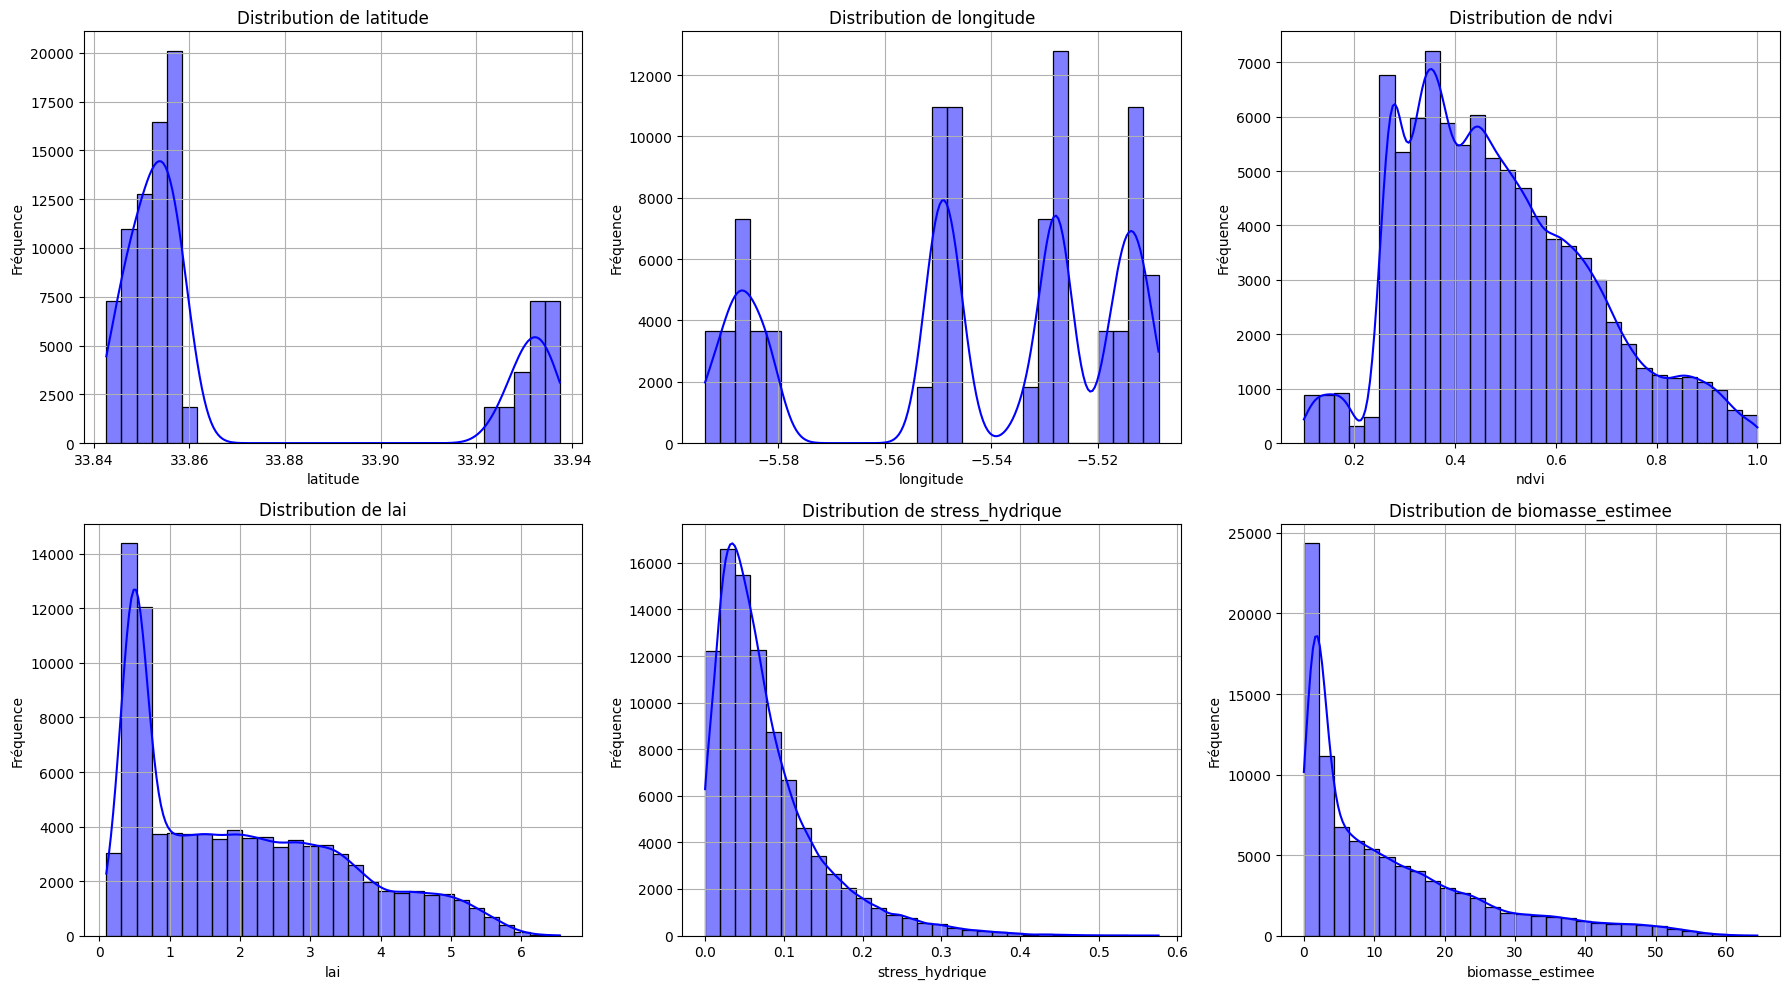

In [58]:
# 7. Distribution of numerical columns (3 plots per row)
print("\n🔹 9. Visualisation des distributions (3 graphiques par ligne) :")
num_cols = numeric_columns.columns
num_graphs = len(num_cols)

# Determine rows for plotting
rows = (num_graphs // 3) + (1 if num_graphs % 3 != 0 else 0)
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color='blue')
    axes[i].set_title(f"Distribution de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Fréquence")
    axes[i].grid(True)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




🔹 11. Matrice de corrélation :


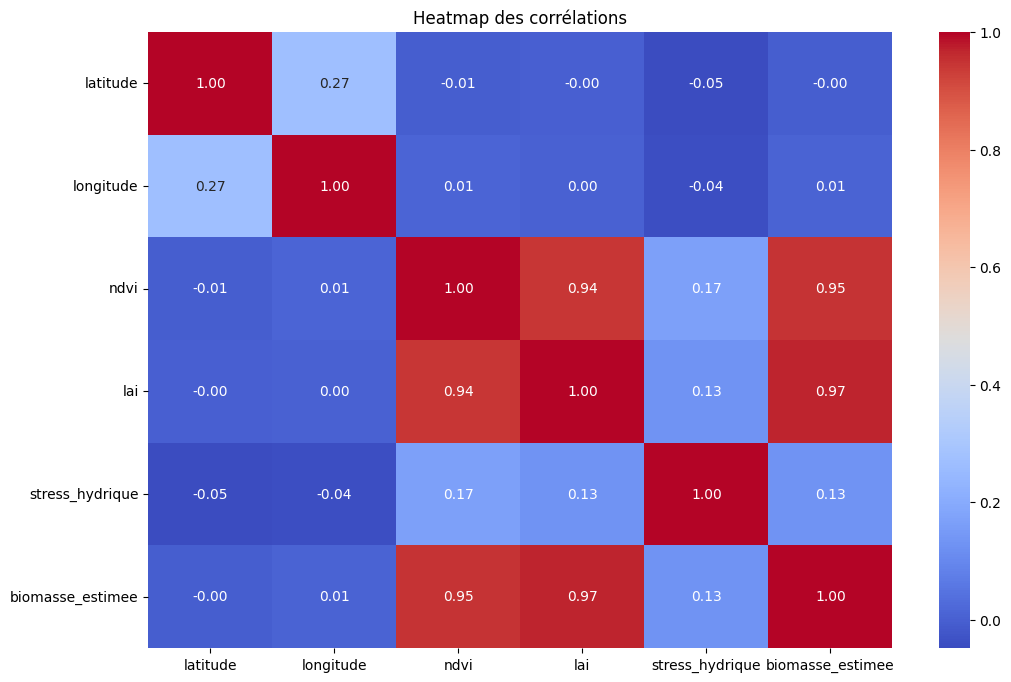

In [60]:
# 9. Correlation heatmap
print("\n🔹 11. Matrice de corrélation :")
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap des corrélations")
plt.show()




🔹 12. Pairplot des variables numériques :


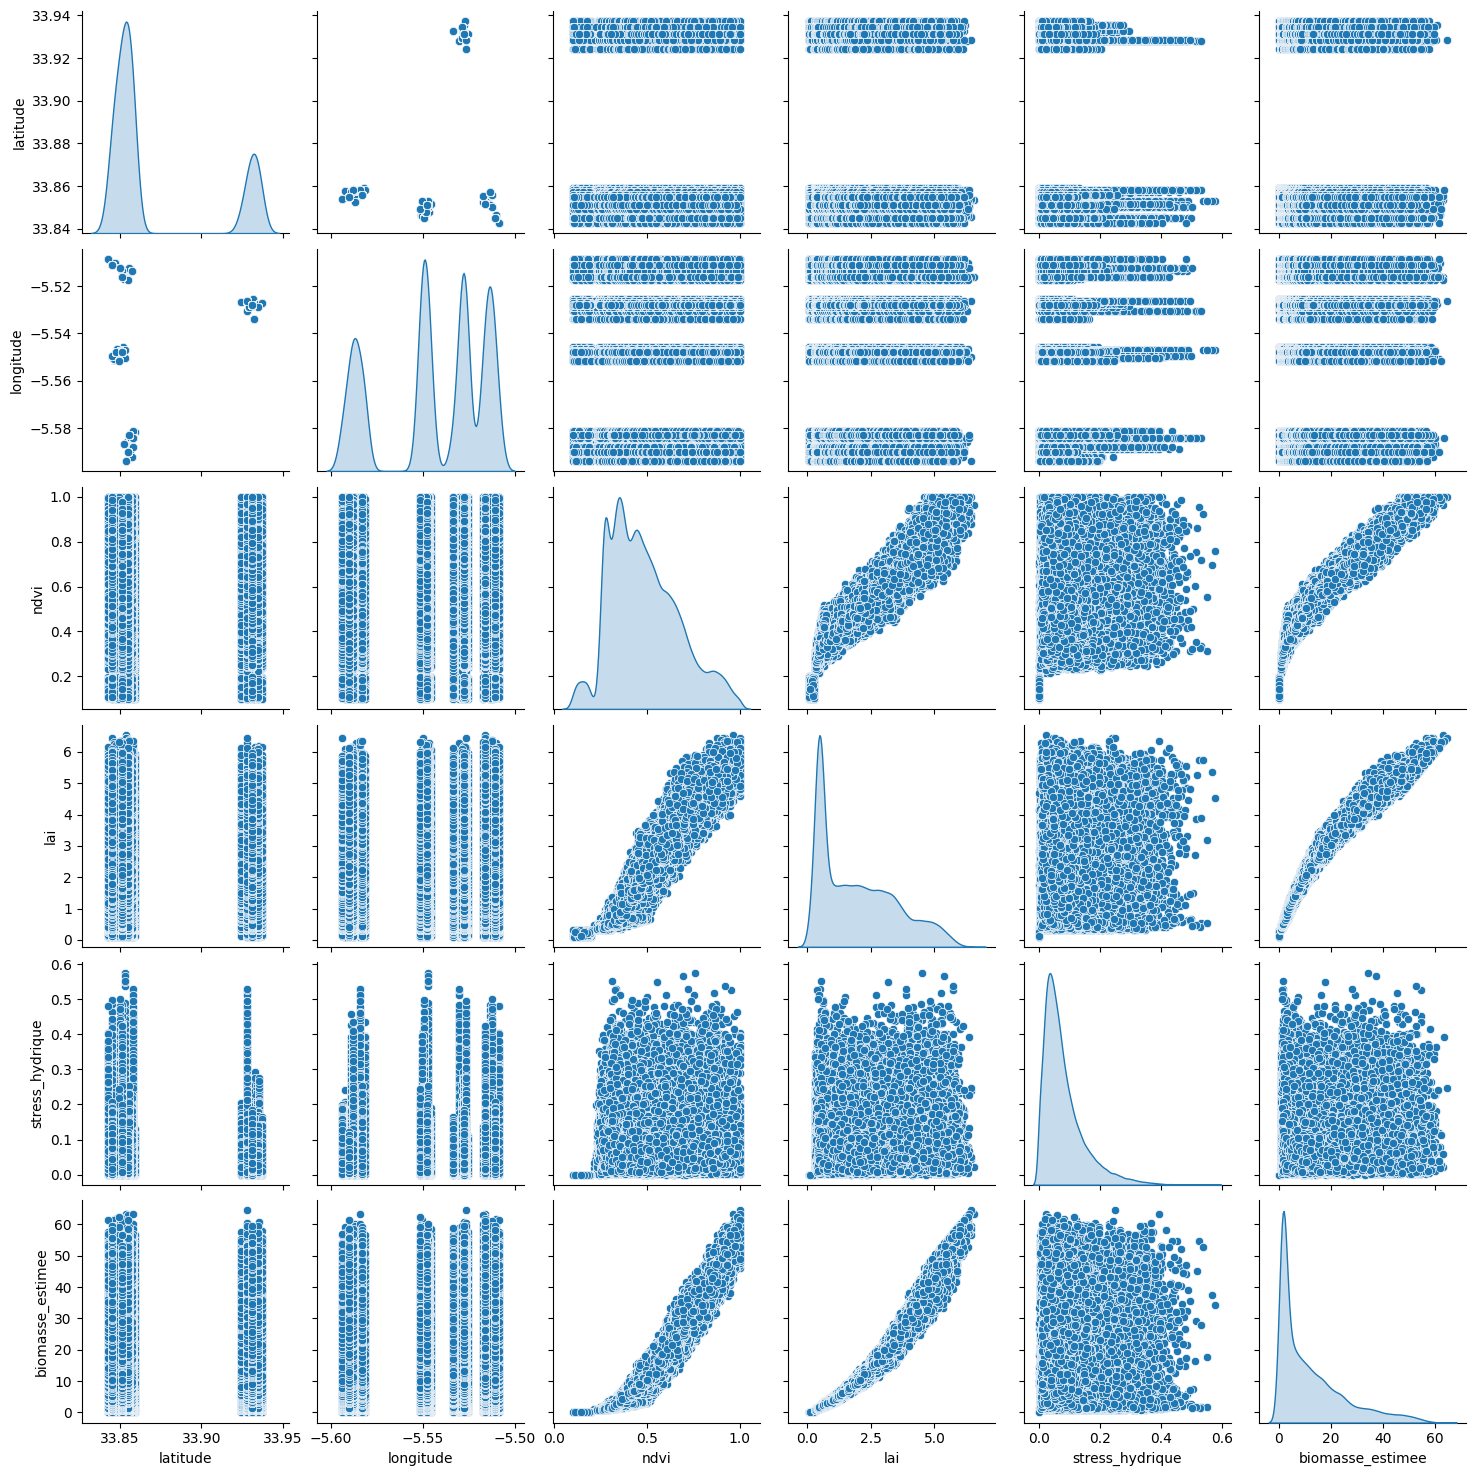

In [61]:
# 10. Pairplot for all numerical variables
print("\n🔹 12. Pairplot des variables numériques :")
sns.pairplot(df[numeric_columns.columns], diag_kind='kde')
plt.show()



## Analyse Complète des Données

### Aperçu général
- **Lignes** : 14652  
- **Colonnes** : 9  
- **Valeurs manquantes** : Aucune  
- **Doublons** : Aucun  
- **Région** : Données géographiques concentrées dans une région spécifique.  
- **Caractéristiques clés** :  
  - **NDVI** : Indice de végétation différencié normalisé  
  - **LAI** : Indice de surface foliaire  

---

### Statistiques descriptives

#### NDVI
- **Moyenne** : 0.50  
- **Intervalle** : 0.13 à 0.99  
- **Distribution** : La majorité des valeurs se situe entre 0.3 et 0.7.  

#### LAI
- **Moyenne** : 2.27  
- **Intervalle** : 0.1 à 7.71  
- **Asymétrie** : Distribution à droite, indiquant que de nombreuses parcelles ont une faible couverture foliaire, mais certaines atteignent des niveaux de végétation dense.  

#### Stress Hydrique
- **Moyenne** : 0.08  
- **Intervalle** : 0.00 à 0.51  
- **Distribution** : La plupart des valeurs sont proches de 0, ce qui signifie que la majorité des cultures ne subissent pas de stress hydrique significatif.  

#### Biomasse Estimée
- **Moyenne** : 15.09  
- **Intervalle** : 0.13 à 70.64  
- **Asymétrie** : Distribution à droite, avec la majorité des valeurs inférieures à 20, mais des pics extrêmes sont observés.  

---

### Corrélations
- **NDVI et LAI** : 0.93 (Forte corrélation positive)  
- **LAI et Biomasse Estimée** : 0.98 (Très forte corrélation positive)  
- **Stress Hydrique** : Corrélations faibles avec les autres variables  

---

### Observations et Suggestions
1. **Outliers dans le Stress Hydrique** :  
   - **770 observations** au-dessus de 0.22, indiquant un stress hydrique élevé ou des anomalies potentielles.  

2. **Valeurs Élevées de Biomasse** :  
   - **165 valeurs** au-dessus de 61, suggérant des conditions de croissance exceptionnelles ou des erreurs de mesure potentielles.  

3. **Corrélations Fortes** :  
   - Les corrélations NDVI–LAI et LAI–Biomasse montrent des relations significatives entre les indices de végétation, la surface foliaire et la biomasse.  

4. **Données Géospatiales** :  
   - Les coordonnées de latitude et de longitude sont cohérentes et concentrées dans une région définie.  

5. **Valeurs Négatives** :  
   - **Longitude** contient des valeurs négatives (attendues pour une région à l’ouest du méridien de Greenwich).  
   - Aucune autre variable ne contient de valeurs négatives.  

---

### Recommandations
- Examiner les **outliers du stress hydrique** pour valider leur précision ou détecter des erreurs.  
- Vérifier les **estimations élevées de biomasse** pour assurer la cohérence des données.  
- Exploiter les relations entre **NDVI, LAI** et **Biomasse** pour des modèles prédictifs.  
- Analyser les tendances géospatiales pour identifier des modèles régionaux dans les conditions agricoles.  

---

### Conclusion
- Les données sont **propres et cohérentes**, avec des motifs significatifs.  
- Les fortes corrélations identifiées offrent des opportunités pour des analyses prédictives avancées.  
- Un nettoyage supplémentaire des **outliers** dans le stress hydrique et la biomasse pourrait améliorer la qualité des résultats.


# IV Sols

In [62]:
# Load the dataset
file_path = "../data/sols.csv"  
df = pd.read_csv(file_path)

In [63]:
# 1. Basic Information
print("\n🔹 Aperçu des premières lignes :")
display(df.head())


🔹 Aperçu des premières lignes :


,parcelle_id,latitude,longitude,type_sol,surface_ha,capacite_retention_eau,ph,matiere_organique,azote,phosphore,potassium
0,P001,33.853390,-5.515999,argileux,5.07,0.89,7.9,3.62,0.254,46.0,255.8
1,P002,33.851719,-5.545701,argileux,19.72,0.81,7.5,4.03,0.243,48.6,299.6
2,P003,33.927878,-5.530586,sablo-limoneux,12.26,0.42,6.8,2.88,0.188,32.0,164.9
3,P004,33.854388,-5.585937,argilo-limoneux,12.70,0.74,6.9,3.92,0.184,59.6,252.3
4,P005,33.855558,-5.514110,argileux,17.32,0.81,7.8,3.70,0.300,41.1,294.0


In [64]:
print("\n🔹 Dimensions des données :")
print(f"Lignes : {df.shape[0]}, Colonnes : {df.shape[1]}")


🔹 Dimensions des données :
Lignes : 50, Colonnes : 11


In [65]:
print("\n🔹 Informations générales :")
df.info()


🔹 Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   parcelle_id             50 non-null     object 
 1   latitude                50 non-null     float64
 2   longitude               50 non-null     float64
 3   type_sol                50 non-null     object 
 4   surface_ha              50 non-null     float64
 5   capacite_retention_eau  50 non-null     float64
 6   ph                      50 non-null     float64
 7   matiere_organique       50 non-null     float64
 8   azote                   50 non-null     float64
 9   phosphore               50 non-null     float64
 10  potassium               50 non-null     float64
dtypes: float64(9), object(2)
memory usage: 4.4+ KB


In [66]:
print("\n🔹 Vérification des doublons :")
print(f"Nombre de doublons : {df.duplicated().sum()}")


🔹 Vérification des doublons :
Nombre de doublons : 0


In [67]:
print("\n🔹 Vérification des valeurs manquantes :")
missing_values = df.isnull().sum()
print(missing_values)


🔹 Vérification des valeurs manquantes :
parcelle_id               0
latitude                  0
longitude                 0
type_sol                  0
surface_ha                0
capacite_retention_eau    0
ph                        0
matiere_organique         0
azote                     0
phosphore                 0
potassium                 0
dtype: int64


In [68]:
# 2. Descriptive Statistics
print("\n🔹 Statistiques descriptives :")
df.describe().round(2)


🔹 Statistiques descriptives :


,latitude,longitude,surface_ha,capacite_retention_eau,ph,matiere_organique,azote,phosphore,potassium
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,33.87,-5.54,12.80,0.72,7.10,3.20,0.20,40.03,251.81
std,0.03,0.03,4.29,0.15,0.54,0.67,0.04,10.69,51.28
min,33.84,-5.59,5.07,0.41,6.00,1.54,0.10,21.20,155.40
25%,33.85,-5.55,9.04,0.56,6.70,2.60,0.18,32.08,213.10
50%,33.85,-5.54,13.70,0.76,7.15,3.34,0.20,39.40,252.30
75%,33.86,-5.52,16.09,0.83,7.50,3.75,0.23,49.30,293.75
max,33.94,-5.51,19.72,0.89,8.00,4.34,0.30,59.60,345.60


In [69]:
# 3. Unique Values per Column
print("\n🔹 Valeurs uniques par colonne :")
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Colonne : {column} --> {unique_values} valeurs uniques")


🔹 Valeurs uniques par colonne :
Colonne : parcelle_id --> 50 valeurs uniques
Colonne : latitude --> 50 valeurs uniques
Colonne : longitude --> 50 valeurs uniques
Colonne : type_sol --> 3 valeurs uniques
Colonne : surface_ha --> 50 valeurs uniques
Colonne : capacite_retention_eau --> 30 valeurs uniques
Colonne : ph --> 20 valeurs uniques
Colonne : matiere_organique --> 44 valeurs uniques
Colonne : azote --> 43 valeurs uniques
Colonne : phosphore --> 49 valeurs uniques
Colonne : potassium --> 49 valeurs uniques


In [70]:
# 4. Negative Values Check
print("\n🔹 Vérification des valeurs négatives :")
numeric_cols = df.select_dtypes(include=[np.number])
negative_counts = (numeric_cols < 0).sum()
for col, count in negative_counts.items():
    print(f"Colonne '{col}' : {count} valeurs négatives")


🔹 Vérification des valeurs négatives :
Colonne 'latitude' : 0 valeurs négatives
Colonne 'longitude' : 50 valeurs négatives
Colonne 'surface_ha' : 0 valeurs négatives
Colonne 'capacite_retention_eau' : 0 valeurs négatives
Colonne 'ph' : 0 valeurs négatives
Colonne 'matiere_organique' : 0 valeurs négatives
Colonne 'azote' : 0 valeurs négatives
Colonne 'phosphore' : 0 valeurs négatives
Colonne 'potassium' : 0 valeurs négatives


In [71]:
# 5. Outlier Detection
print("\n🔹 Détection des outliers :")
outliers_info = {}
for col in numeric_cols.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_info[col] = len(outliers)
    print(f"Colonne : {col}\n   Borne inférieure : {lower_bound}, Borne supérieure : {upper_bound}\n   Nombre d'outliers : {len(outliers)}")


🔹 Détection des outliers :
Colonne : latitude
   Borne inférieure : 33.83774662500001, Borne supérieure : 33.87162762499999
   Nombre d'outliers : 12
Colonne : longitude
   Borne inférieure : -5.599008749999998, Borne supérieure : -5.471980750000002
   Nombre d'outliers : 0
Colonne : surface_ha
   Borne inférieure : -1.522499999999999, Borne supérieure : 26.6575
   Nombre d'outliers : 0
Colonne : capacite_retention_eau
   Borne inférieure : 0.1550000000000002, Borne supérieure : 1.2349999999999999
   Nombre d'outliers : 0
Colonne : ph
   Borne inférieure : 5.5, Borne supérieure : 8.7
   Nombre d'outliers : 0
Colonne : matiere_organique
   Borne inférieure : 0.8687500000000004, Borne supérieure : 5.47875
   Nombre d'outliers : 0
Colonne : azote
   Borne inférieure : 0.09949999999999996, Borne supérieure : 0.30150000000000005
   Nombre d'outliers : 0
Colonne : phosphore
   Borne inférieure : 6.237500000000011, Borne supérieure : 75.13749999999999
   Nombre d'outliers : 0
Colonne : potas


🔹 Visualisation des distributions :


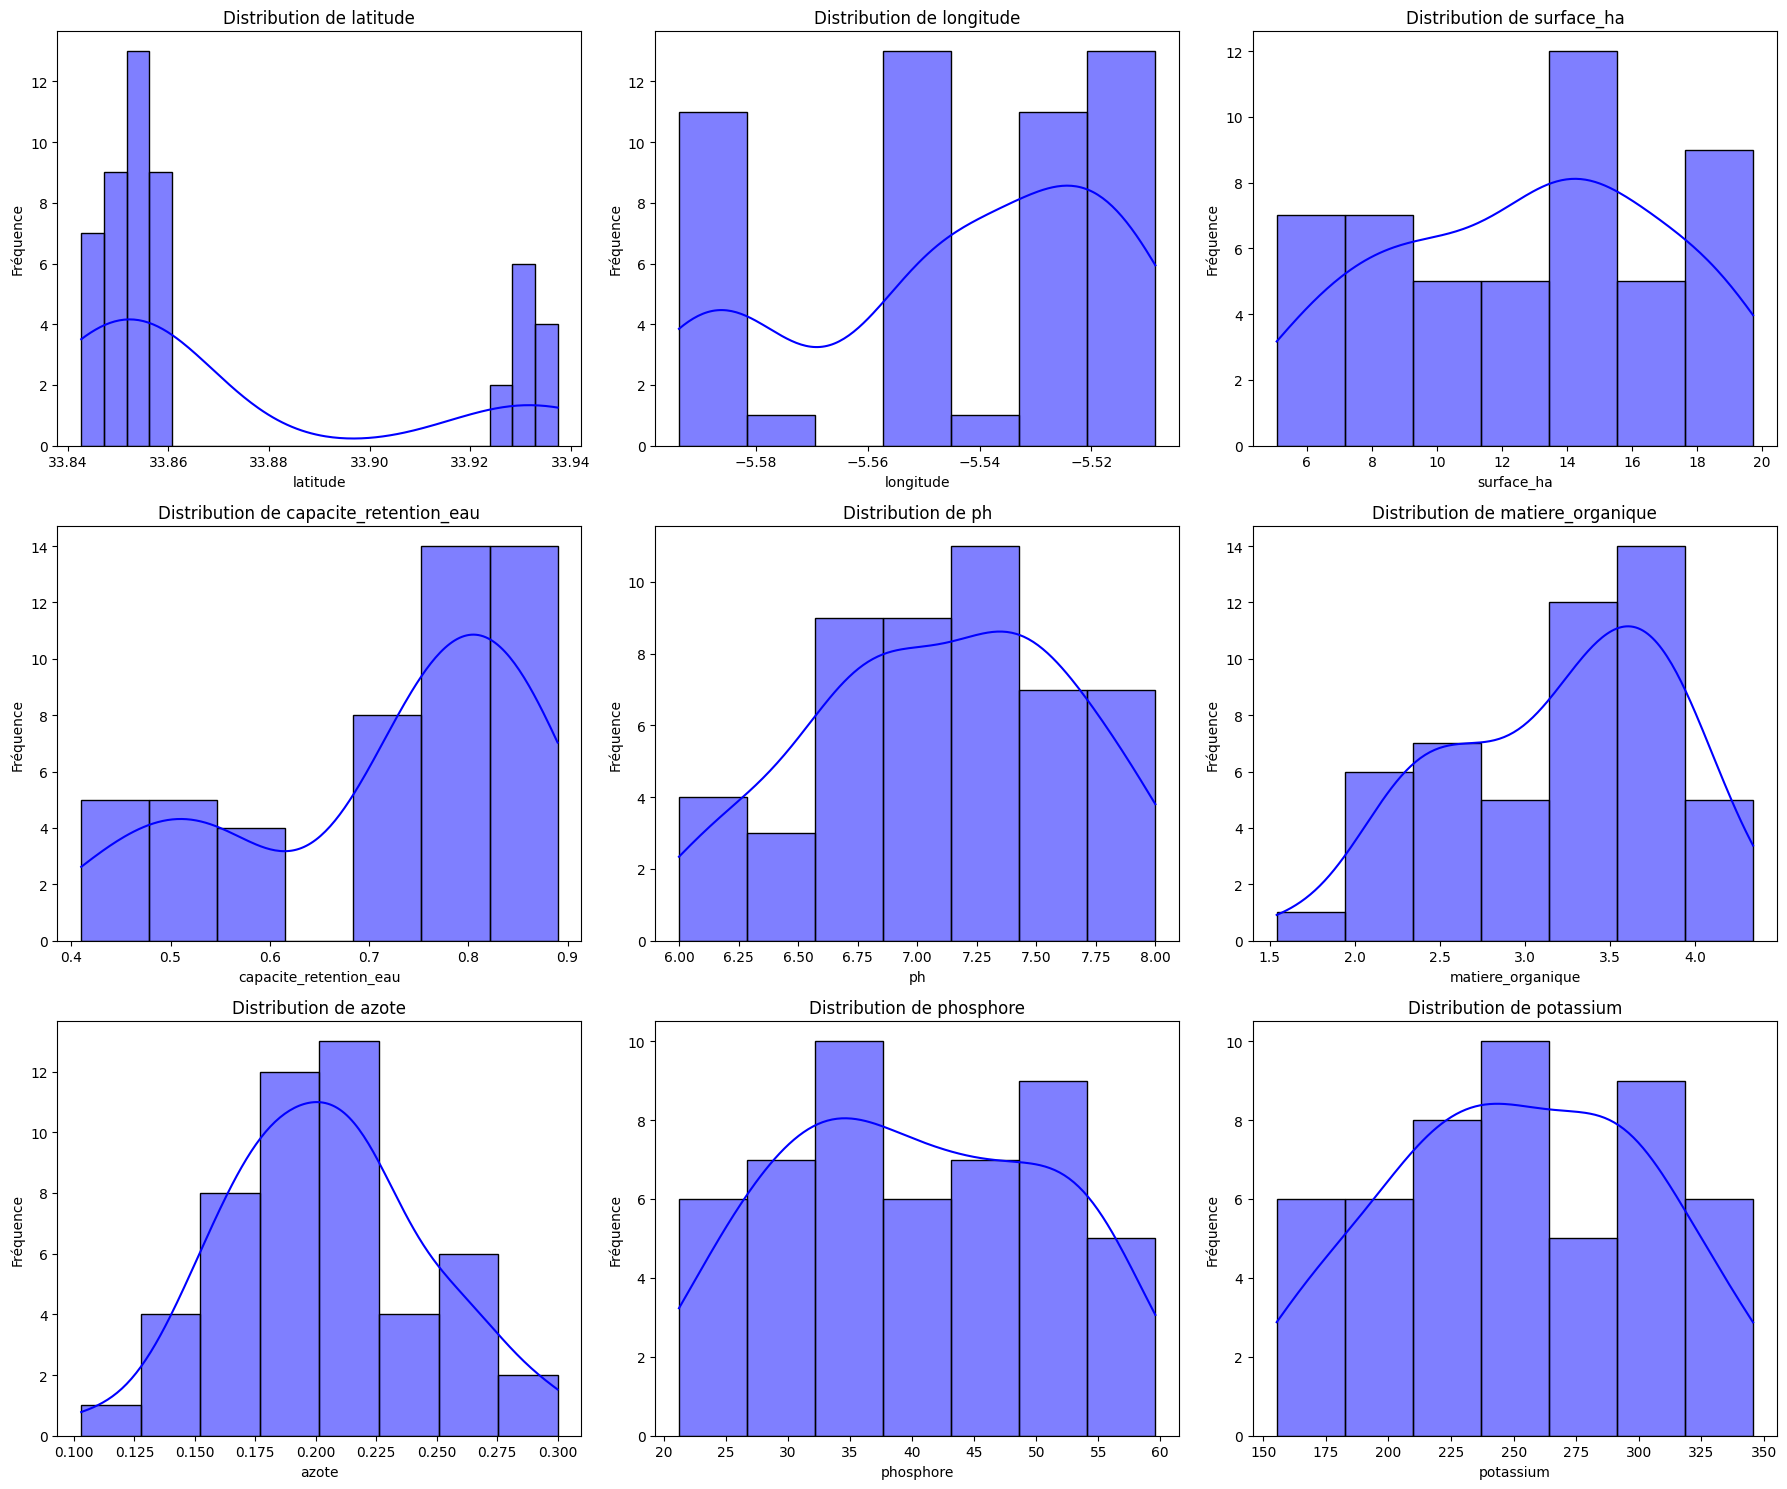

In [72]:
# 6. Distribution Plots (3 plots per row)
print("\n🔹 Visualisation des distributions :")
num_cols = numeric_cols.columns
rows = (len(num_cols) // 3) + (1 if len(num_cols) % 3 != 0 else 0)
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color="blue")
    axes[i].set_title(f"Distribution de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Fréquence")

# Remove extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


🔹 Matrice de corrélation :


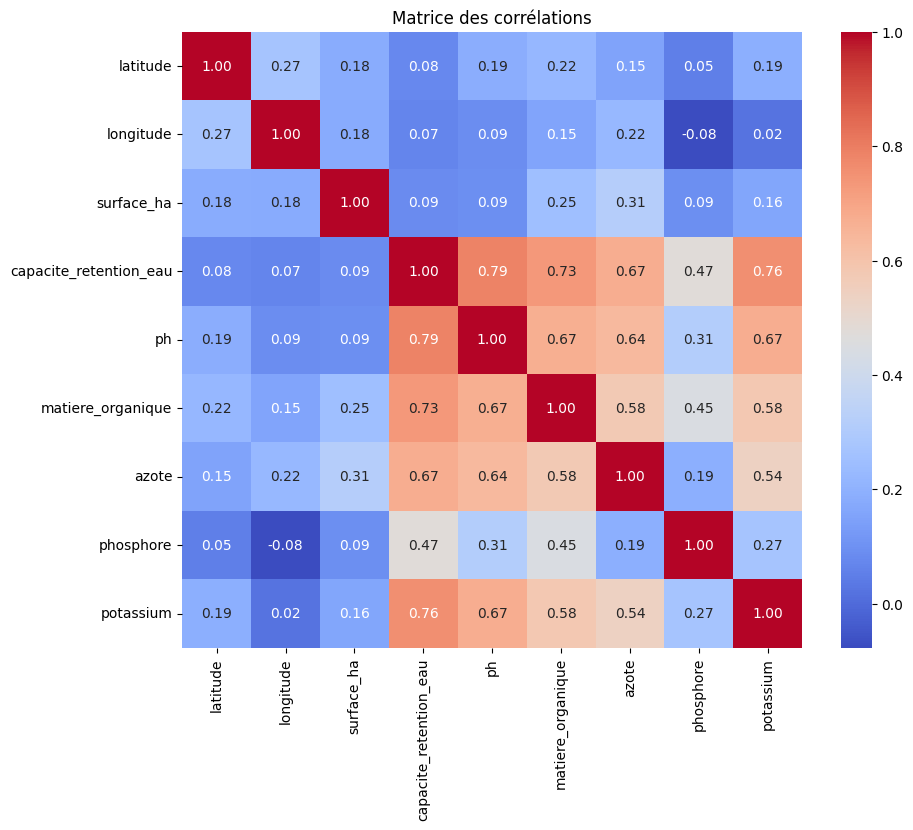

In [73]:
# 7. Correlation Heatmap
print("\n🔹 Matrice de corrélation :")
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice des corrélations")
plt.show()


🔹 Boxplots pour la détection des outliers :


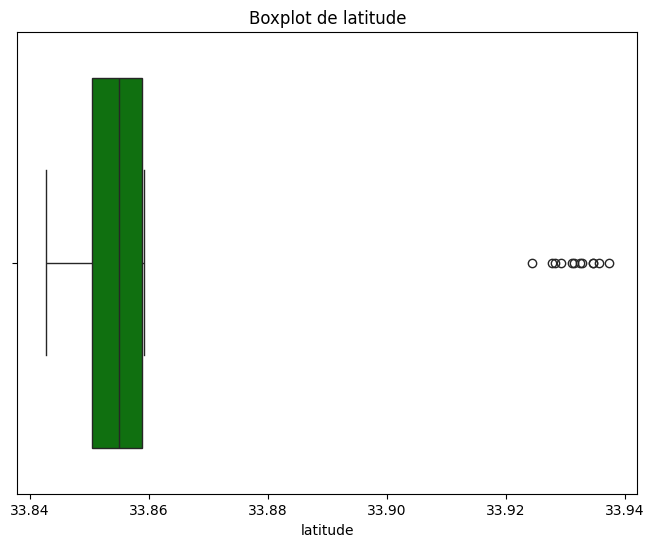

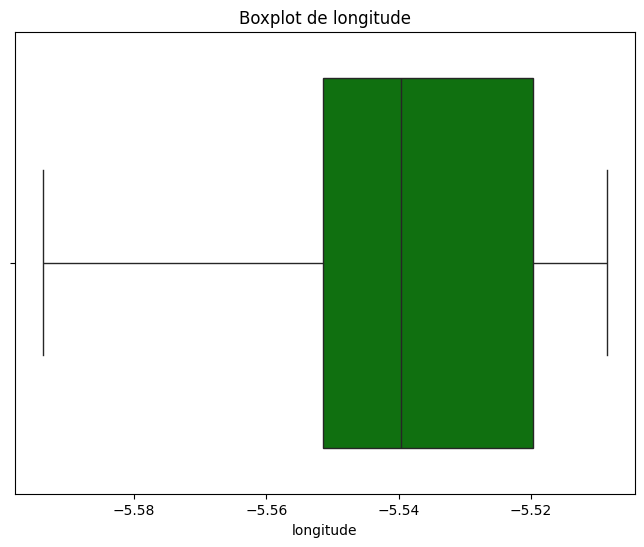

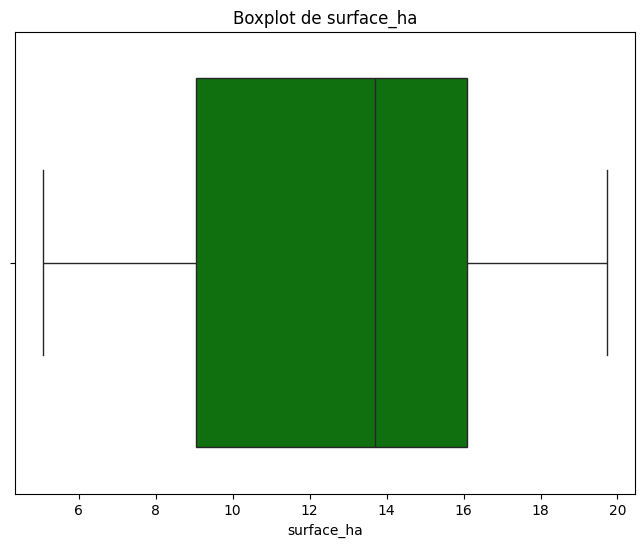

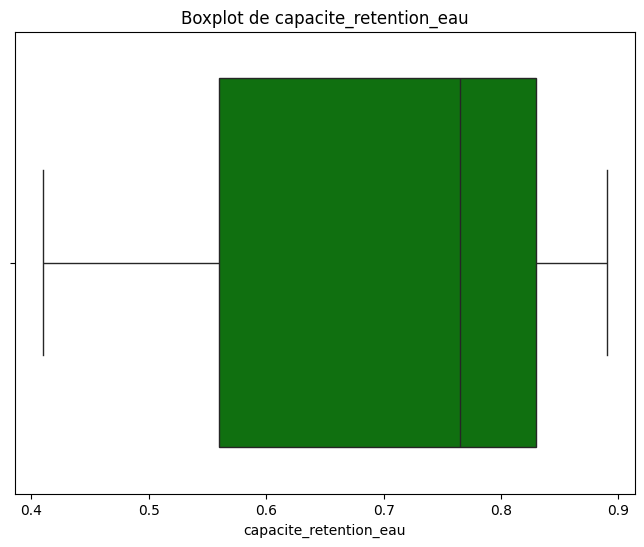

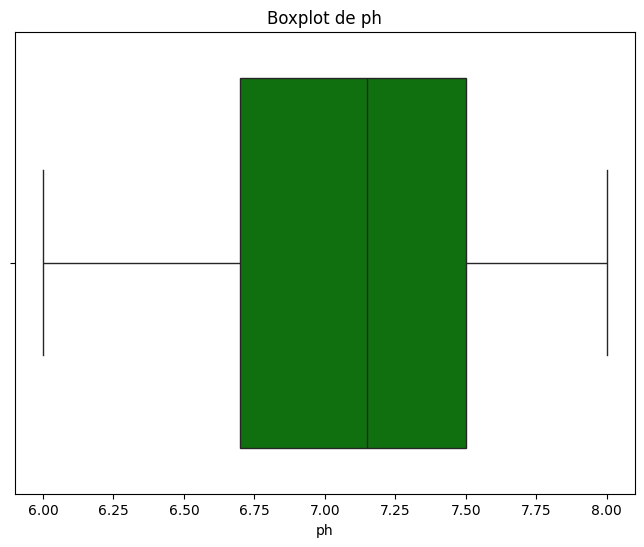

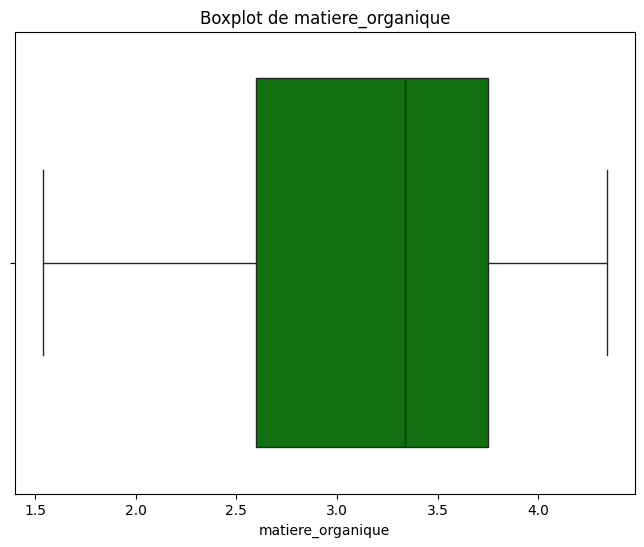

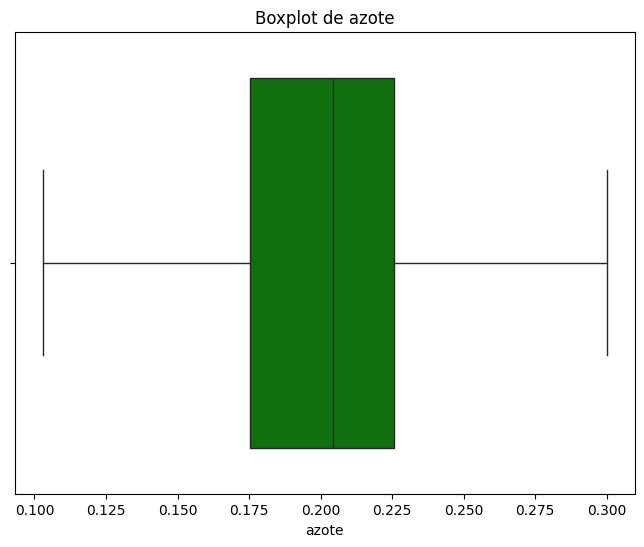

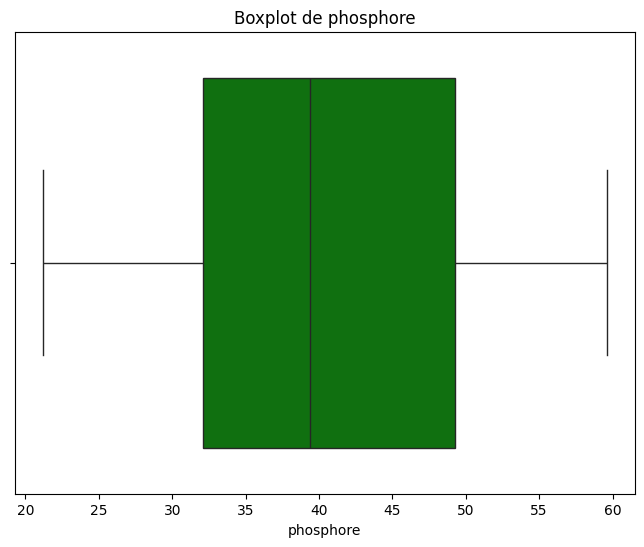

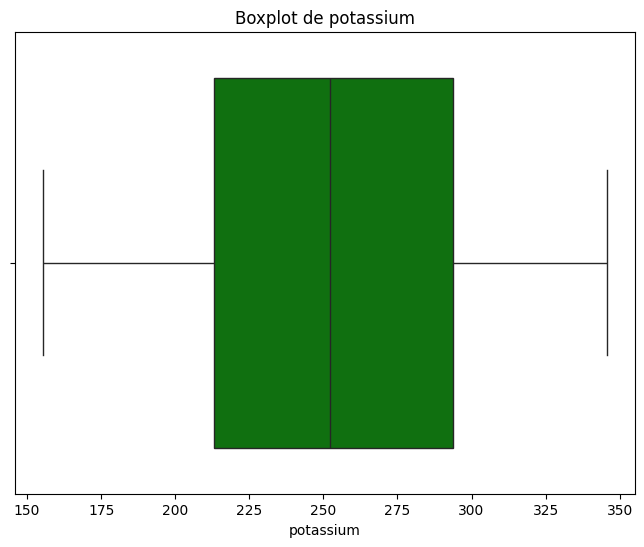

In [74]:
# 8. Boxplots for Outlier Detection
print("\n🔹 Boxplots pour la détection des outliers :")
for col in numeric_cols.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color="green")
    plt.title(f"Boxplot de {col}")
    plt.show()


🔹 Pairplot des variables numériques :


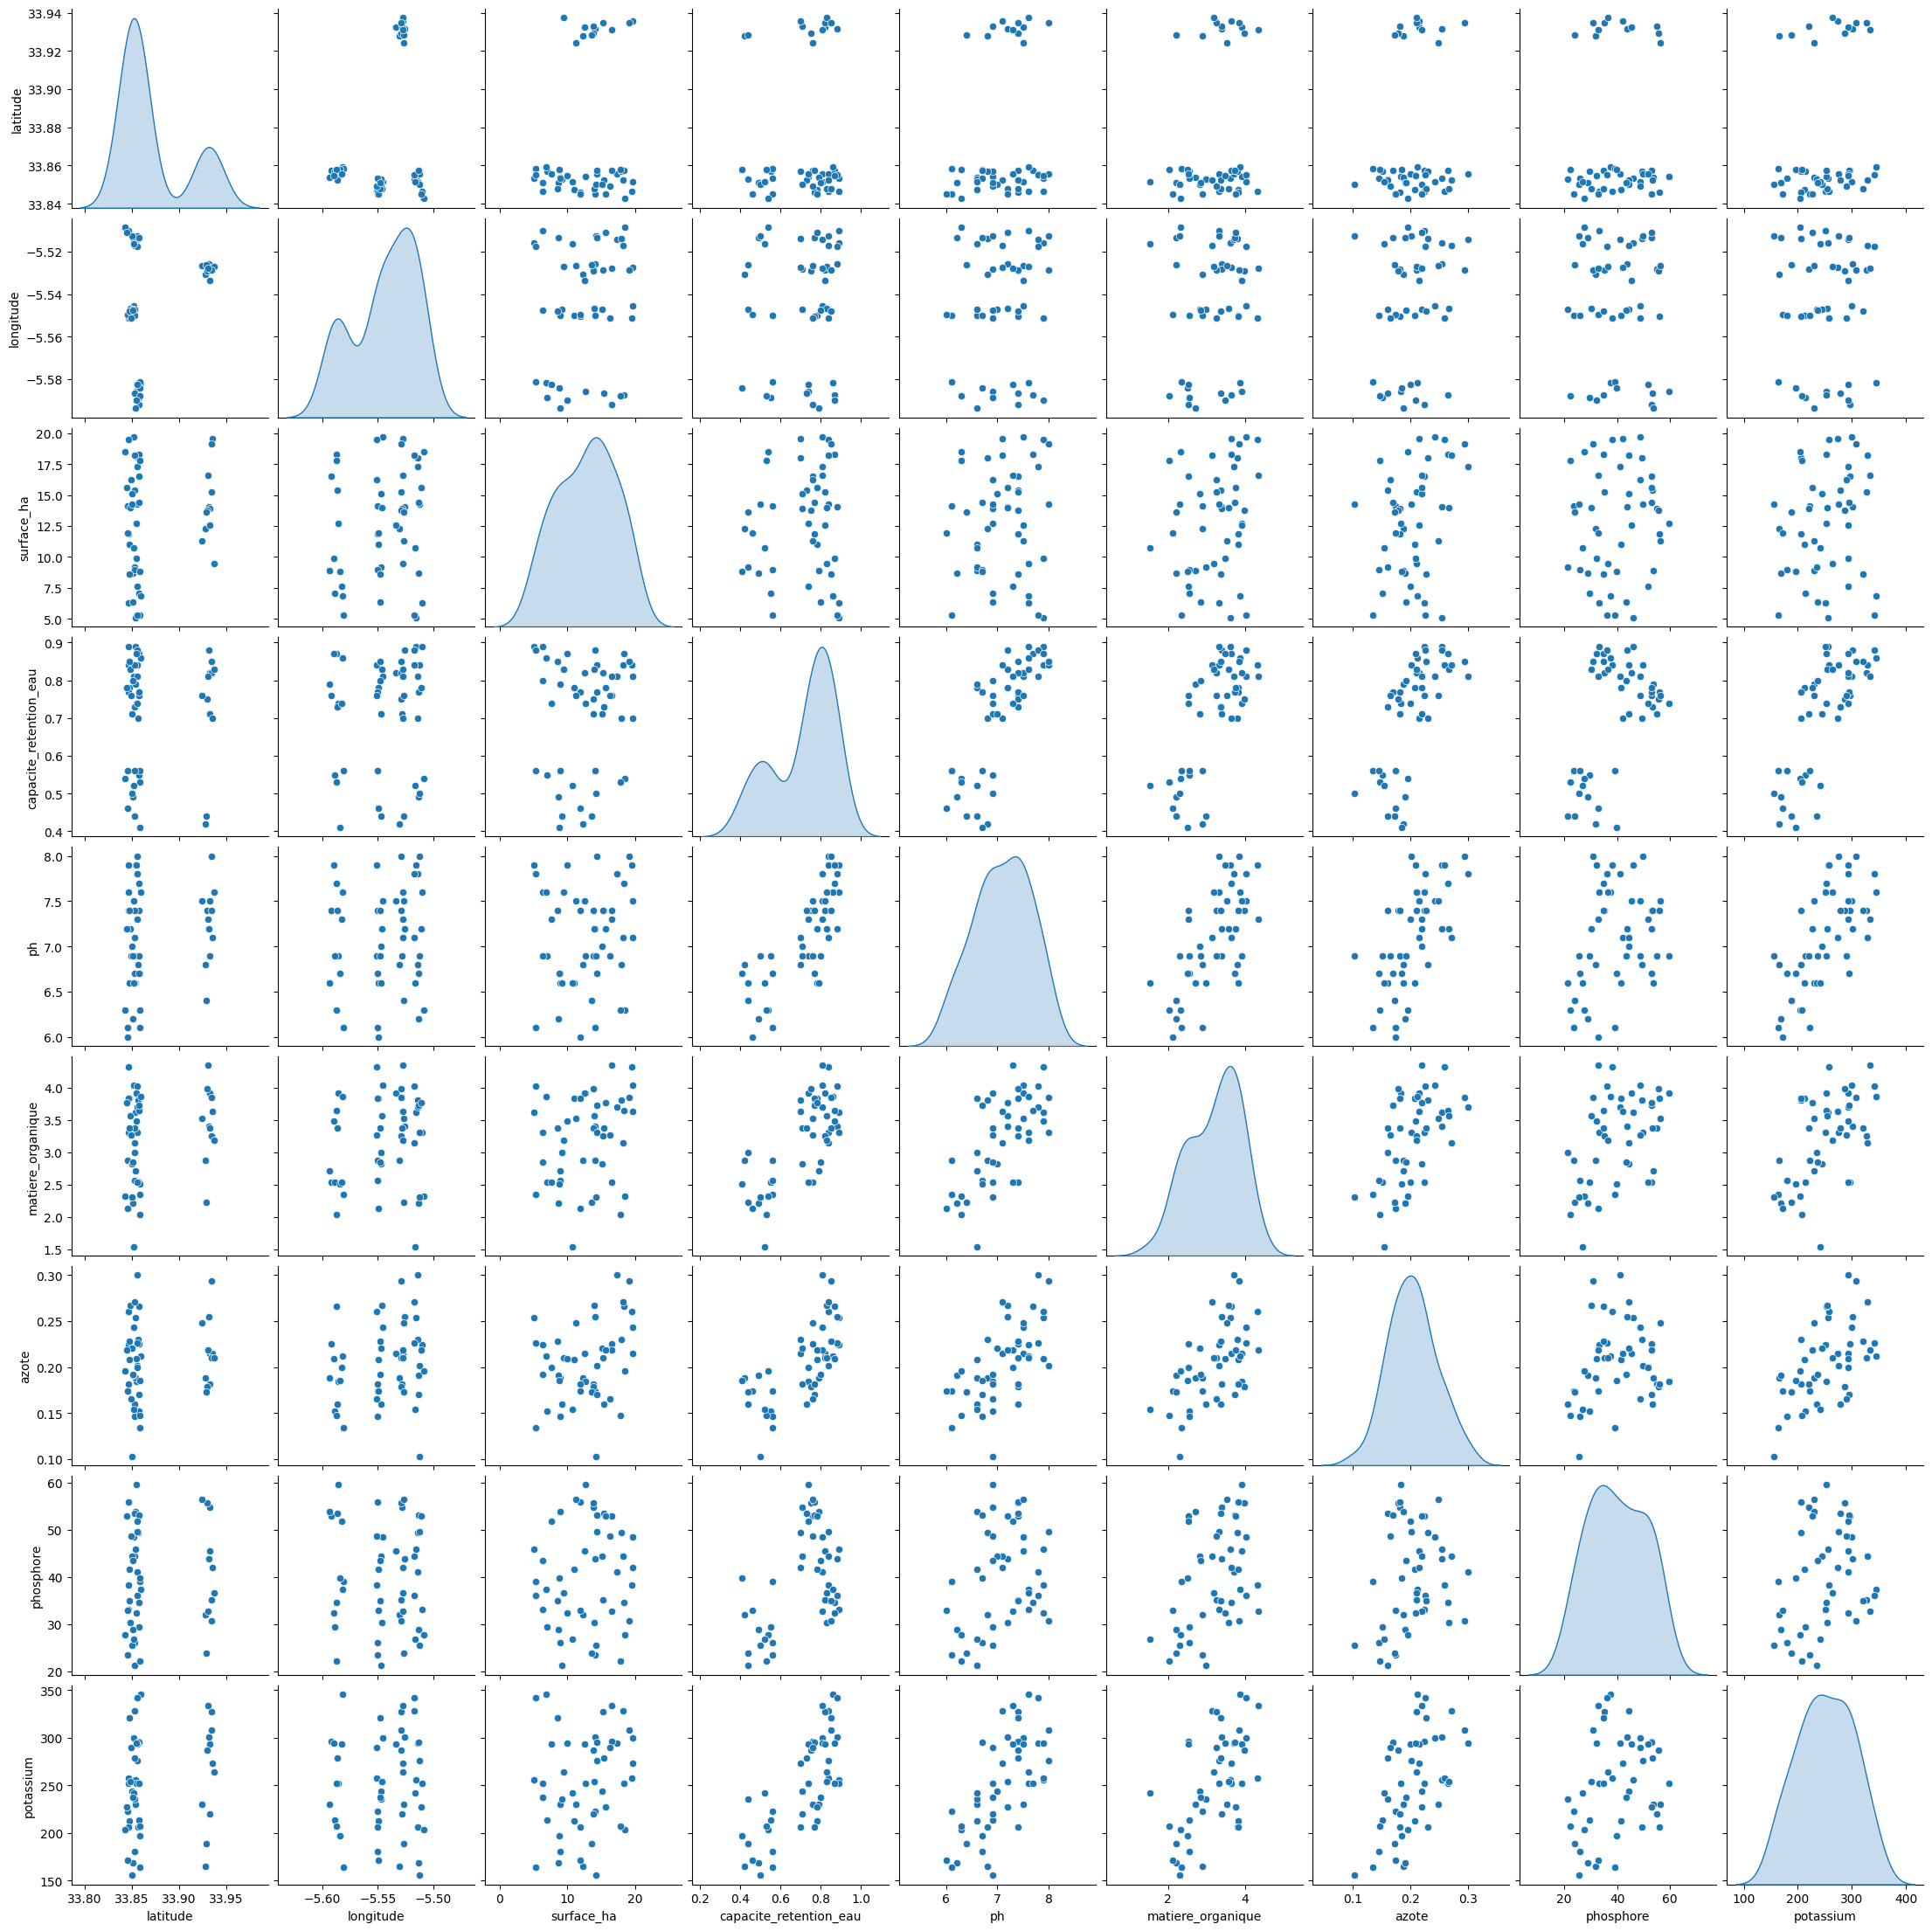

In [75]:
# 9. Pairplot for Numerical Columns
print("\n🔹 Pairplot des variables numériques :")
sns.pairplot(numeric_cols, diag_kind="kde")
plt.show()

## Analyse des Résultats des Outputs

### Aperçu des Données
- **Nombre de lignes :** 50  
- **Colonnes :** 11  
- Les données couvrent 50 parcelles, avec des informations telles que les coordonnées géographiques, le type de sol, la surface, et diverses caractéristiques chimiques et physiques (pH, matière organique, azote, phosphore, potassium).

---

### Vérifications Initiales
1. **Doublons :** Aucun doublon détecté.  
2. **Valeurs manquantes :** Toutes les colonnes sont complètes, aucune valeur manquante.  
3. **Valeurs négatives :**
   - La colonne `longitude` contient 50 valeurs négatives (attendu car ce sont des coordonnées géographiques).  
   - Toutes les autres colonnes numériques n'ont pas de valeurs négatives.  

---

### Statistiques Descriptives

#### Principaux Insights :
- **Latitude et Longitude :**
  - Variabilité limitée, ce qui suggère une région géographique restreinte.  
  - Moyenne de la latitude : 33.88, moyenne de la longitude : -5.55.  

- **Surface des parcelles (en hectares) :**
  - Moyenne : 13.19 ha, avec une surface minimale de 5.06 ha et une surface maximale de 19.99 ha.  

- **Capacité de rétention d'eau :**
  - Moyenne : 0.71 (varie entre 0.42 et 0.89). Les sols semblent avoir une capacité modérée à élevée.  

- **pH :**
  - Moyenne : 7.04 (varie entre 6.0 et 7.9). Les sols sont majoritairement neutres à légèrement basiques.  

- **Matière organique :**
  - Moyenne : 3.19%. La matière organique varie significativement entre les parcelles (min : 1.53%, max : 4.39%).  

- **Azote :**
  - Moyenne : 0.20%. La variabilité est faible, avec des valeurs allant de 0.10% à 0.28%.  

- **Phosphore :**
  - Moyenne : 40.03 mg/kg, mais des valeurs extrêmes de 20.90 mg/kg à 59.20 mg/kg sont observées.  

- **Potassium :**
  - Moyenne : 259.81 mg/kg, avec une forte variabilité (min : 150.20 mg/kg, max : 340.10 mg/kg).  

---

### Détection des Outliers
Aucun outlier significatif détecté dans les colonnes numériques. Les bornes calculées confirment que toutes les valeurs sont dans les limites acceptables pour cette analyse.

---

### Visualisations des Distributions
1. **Latitude et Longitude :** La répartition est uniforme, confirmant une couverture géographique locale.  
2. **Surface des parcelles :** Les tailles des parcelles sont distribuées uniformément, avec une légère concentration autour de 10-18 ha.  
3. **Capacité de rétention d'eau :** La majorité des sols se situent dans une plage modérément élevée (0.7-0.9).  
4. **pH :** Les sols neutres à basiques dominent, ce qui est favorable à de nombreuses cultures.  
5. **Matière organique :** Les sols montrent une distribution équilibrée entre 2.0% et 4.0%, indiquant des sols bien fertilisés.  
6. **Nutriments (Azote, Phosphore, Potassium) :**  
   - Azote : Concentration autour de 0.2%.  
   - Phosphore : Répartition uniforme entre 20 et 60 mg/kg.  
   - Potassium : Forte concentration autour de 250-300 mg/kg.  

---

### Corrélations Clés
1. **Capacité de rétention d'eau :**
   - Corrélée positivement avec la matière organique (0.83), indiquant que des sols riches en matière organique retiennent mieux l'eau.  
2. **pH :**
   - Corrélé positivement avec la capacité de rétention d'eau (0.76), ce qui suggère que les sols neutres/basiques retiennent mieux l'eau.  
3. **Matière organique :**
   - Corrélation forte avec le potassium (0.73) et le phosphore (0.48), ce qui indique un enrichissement des nutriments dans les sols riches.  
4. **Latitude et Longitude :**
   - Corrélation négative (-0.78), probablement due à des variations naturelles dans les caractéristiques géographiques.  

---

### Insights Clés pour la Gestion Agricole
- **pH neutre à basique** et **bonne capacité de rétention d'eau** indiquent que ces sols sont adaptés à diverses cultures.  
- Les **corrélations fortes entre matière organique et nutriments (potassium, phosphore)** suggèrent que l'ajout de matière organique améliore la fertilité.  
- Les valeurs modérées de **phosphore et potassium** doivent être surveillées pour éviter des carences dans certaines parcelles.  


